# 匯入套件&資料集

In [1]:
import pandas as pn
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_absolute_percentage_error#MAPE

from keras.datasets import mnist
from keras import models 
from keras import layers
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras import backend as K
from keras.layers import Dense, Activation, Flatten

from keras.models import Sequential
from matplotlib import pyplot as plt
import matplotlib.pyplot as mp

In [2]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def mae_m(y_true, y_pred):
    return K.mean(K.abs(y_true - y_pred))

def mse_m(y_true, y_pred):
     return K.mean(K.square(y_true - y_pred))

def rmse_m(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred)))

def mape_m(y_true, y_pred):
    return K.mean(K.abs((y_true - y_pred)/ y_true ))    

# 類別預測

In [3]:
ObesityDataSet = pn.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', skiprows = 1, header=None,  names=["Gender","Age","Height","Weight","family_history_with_overweight","FAVC","FCVC","NCP","CAEC","SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS","NObeyesdad"])

In [4]:
ObesityDataSet
#欄位說明:

#與飲食習慣相關的屬性有：頻繁食用高熱量食物（FAVC）
#食用蔬菜頻率（FCVC）
#主餐次數（NCP）
#兩餐之間的飲食習慣(吃點心之類的)（CAEC）
#抽煙習慣（SMOKE）
#每日飲水量（CH20）
#飲酒頻率 (CALC)

#與身體狀況相關的屬性有：監測卡路里消耗的習慣（SCC）
#運動頻率（FAF）
#使用電子設備(手機)的時間（TUE）
#常用的交通工具（MTRANS）
#獲得的其他變量有：性別、年齡、身高、體重及家庭過去超重案例

#類別變量 NObesity，包括：體重不足、正常體重、I 級超重、II 級超重、I 型肥胖、II 型肥胖和 III 型肥胖

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## 資料量化

In [5]:
def dataCleaning(dataSet):    
    #量化_換成number 0 1 2 3 (量化)
    
    Gender = {'Male': 0, 'Female': 1}
    try:
        dataSet['Gender'] = dataSet['Gender'].map(Gender)
    except:
        i = 1#不做處理
    else:
        i = 1
        
    family_history_with_overweight = {'no': 0, 'yes': 1}
    try:
        dataSet['family_history_with_overweight'] = dataSet['family_history_with_overweight'].map(family_history_with_overweight)
    except:
        i = 1#不做處理
    else:
        i = 1  
        
    FAVC = {'no': 0, 'yes': 1}
    try:
        dataSet['FAVC'] = dataSet['FAVC'].map(FAVC)
    except:
        i = 1#不做處理
    else:
        i = 1        
        
    CAEC = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
    try:
        dataSet['CAEC'] = dataSet['CAEC'].map(CAEC)
    except:
        i = 1#不做處理
    else:
        i = 1        
        
    SMOKE = {'no': 0, 'yes': 1}
    try:
        dataSet['SMOKE'] = dataSet['SMOKE'].map(SMOKE)
    except:
        i = 1#不做處理
    else:
        i = 1        
        
    SCC = {'no': 0, 'yes': 1}
    try:
        dataSet['SCC'] = dataSet['SCC'].map(SCC)
    except:
        i = 1#不做處理
    else:
        i = 1        
        
    CALC = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
    try:
        dataSet['CALC'] = dataSet['CALC'].map(CALC)
    except:
        i = 1#不做處理
    else:
        i = 1        

    MTRANS = {'Automobile': 0, 'Motorbike': 1, 'Bike': 2, 'Public_Transportation': 3, 'Walking': 4}
    try:
        dataSet['MTRANS'] = dataSet['MTRANS'].map(MTRANS)
    except:
        i = 1#不做處理
    else:
        i = 1        

    NObeyesdad = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}
    try:
        dataSet['NObeyesdad'] = dataSet['NObeyesdad'].map(NObeyesdad)
    except:
        i = 1#不做處理
    else:
        i = 1        
        
    return dataSet
    

In [6]:
ObesityDataSet = dataCleaning(ObesityDataSet)
#ObesityDataSet.astype(np.int64)

## 檢查缺失值

In [7]:
ObesityDataSet.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## 設定答案

In [8]:
ObesityDataSet_target = ObesityDataSet.pop('NObeyesdad')

## 拆分訓練集與測試集

In [9]:
X_train,X_test,y_train,y_test = train_test_split(ObesityDataSet,ObesityDataSet_target,test_size=0.2)

In [10]:
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
X_train

X_train original shape (1688, 16)
y_train original shape (1688,)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1522,0,28.363149,1.793476,112.725005,1,1,1.991240,3.000000,1,0,2.000000,0,0.000000,0.292956,1,3
1358,0,18.000000,1.792687,108.204547,1,1,2.000000,2.478794,1,0,2.967064,0,1.000000,0.434600,0,3
758,0,21.000000,1.605404,68.226511,0,1,2.000000,1.915400,0,0,3.000000,0,1.000000,0.000000,1,3
345,0,17.000000,1.700000,55.000000,0,1,3.000000,3.000000,3,0,2.000000,0,3.000000,1.000000,1,3
1271,1,18.000000,1.670058,86.242679,1,1,2.609123,3.000000,1,0,1.955053,0,1.186013,0.000000,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,1,26.000000,1.645990,111.922491,1,1,3.000000,3.000000,1,0,2.786780,0,0.000000,0.097760,1,3
894,0,26.787842,1.817641,87.107317,0,1,2.971588,2.743277,1,0,1.394883,0,2.000000,0.470243,0,0
1220,0,21.196152,1.650000,88.472359,1,1,2.427700,1.001633,1,0,3.000000,0,1.172641,1.000000,0,3
745,0,26.698580,1.816298,86.963765,0,1,2.341133,1.578521,1,0,2.000000,0,2.000000,0.554072,0,0


## 模型建模

In [11]:
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(7, activation='softmax'))
#network.add(Flatten())
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['acc',f1_m,precision_m, recall_m])
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 519
Trainable params: 519
Non-trainable params: 0
_________________________________________________________________


## 訓練&輸出

In [12]:
y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)
history1 = network.fit(X_train, y_train, epochs=50, batch_size=32 , steps_per_epoch=50,  validation_steps=30)
loss, accuracy, f1_score, precision, recall =  network.evaluate(X_test, y_test)

Epoch 1/50
50/50 [==============================] - 1s 1ms/step - loss: 12.5861 - acc: 0.1531 - f1_m: 0.1486 - precision_m: 0.1582 - recall_m: 0.1412
Epoch 2/50
50/50 [==============================] - 0s 1ms/step - loss: 3.0872 - acc: 0.1878 - f1_m: 0.1321 - precision_m: 0.1911 - recall_m: 0.1054
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 1.8116 - acc: 0.2418 - f1_m: 0.0900 - precision_m: 0.2440 - recall_m: 0.0592
Epoch 4/50
50/50 [==============================] - 0s 1ms/step - loss: 1.6670 - acc: 0.3072 - f1_m: 0.0671 - precision_m: 0.2385 - recall_m: 0.0404        
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 1.6420 - acc: 0.3166 - f1_m: 0.0979 - precision_m: 0.3597 - recall_m: 0.0596       
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 1.5110 - acc: 0.3932 - f1_m: 0.1430 - precision_m: 0.4814 - recall_m: 0.0877
Epoch 7/50
50/50 [==============================] - 0s 1ms/step - loss: 1.4808 - acc: 0.43

In [13]:
print('Loss:', np.round(loss, 4))
print('Accuracy: ', np.round(accuracy, 4))
print('Precision: ', np.round(precision, 4))
print('Recall: ', np.round(recall, 4))
print('F1 score: ', np.round(f1_score, 4))

Loss: 0.7635
Accuracy:  0.7092
Precision:  0.7967
Recall:  0.5265
F1 score:  0.6322


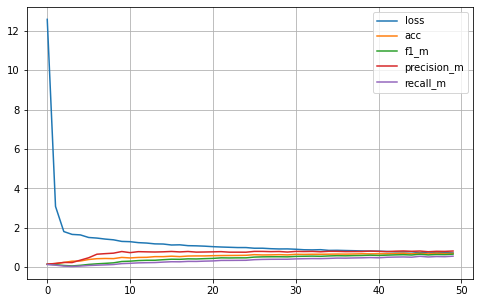

In [14]:
#history.history['mape_m']=list(map(lambda x:x/100, history.history['mape_m']))
history1.history['loss']=list(map(lambda x:x, history1.history['loss']))
pn.DataFrame(history1.history).plot(figsize = (8, 5))
plt.grid(True)
plt.show()

# 數值預測

In [15]:
ObesityDataSet = pn.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', skiprows = 1, header=None,  names=["Gender","Age","Height","Weight","family_history_with_overweight","FAVC","FCVC","NCP","CAEC","SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS","NObeyesdad"])

In [16]:
ObesityDataSet = dataCleaning(ObesityDataSet)

In [17]:
ObesityDataSet

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,3,1
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,3,1
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,3,1
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,4,5
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,3,4
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,3,4
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,3,4
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,3,4


## 檢查缺失值

In [18]:
ObesityDataSet.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## 設定答案

In [19]:
ObesityDataSet_target = ObesityDataSet.pop('CH2O')

## 拆分訓練集與測試集

In [20]:
X_train,X_test,y_train,y_test = train_test_split(ObesityDataSet,ObesityDataSet_target,test_size=0.2)

In [21]:
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
X_train.shape

X_train original shape (1688, 16)
y_train original shape (1688,)


(1688, 16)

## 模型建模

In [22]:
network1 = models.Sequential()
network1.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
network1.add(layers.Dense(10, activation='relu'))
network1.add(layers.Dense(10, activation='relu'))
network1.add(layers.Dense(10, activation='relu'))
network1.add(layers.Dense(10, activation='relu'))
network1.add(layers.Dense(1))
network1.add(Flatten())
network1.compile(optimizer='sgd', loss='mse',metrics=[mae_m,rmse_m,mape_m])

network1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
 flatten (Flatten)           (None, 1)                

## 正規化

In [23]:
#從28*28 pixels建立輸入向量  (784維度，28*28)
X_train = X_train.values.reshape(1688,16)
X_test = X_test.values.reshape(423,16)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#正規化測試資料 (0到1之間)
X_train /= 255
X_test /= 255

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

#訓練用最後輸入的維度
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (1688, 16)
Test matrix shape (423, 16)


## 訓練&輸出

In [24]:
history = network1.fit(X_train, y_train, epochs=80, batch_size=20, steps_per_epoch=50,  validation_steps=30)
#
loss, MAE, RMSE, MAPE =  network1.evaluate(X_test, y_test)

Epoch 1/80
50/50 [==============================] - 1s 1ms/step - loss: 1.2196 - mae_m: 0.8802 - rmse_m: 0.9971 - mape_m: 0.4462
Epoch 2/80
50/50 [==============================] - 0s 1ms/step - loss: 0.3659 - mae_m: 0.4668 - rmse_m: 0.6014 - mape_m: 0.2846
Epoch 3/80
50/50 [==============================] - 0s 1ms/step - loss: 0.3679 - mae_m: 0.4698 - rmse_m: 0.6030 - mape_m: 0.2914
Epoch 4/80
50/50 [==============================] - 0s 1ms/step - loss: 0.3669 - mae_m: 0.4687 - rmse_m: 0.6005 - mape_m: 0.2893
Epoch 5/80
50/50 [==============================] - 0s 1ms/step - loss: 0.3756 - mae_m: 0.4750 - rmse_m: 0.6075 - mape_m: 0.2965
Epoch 6/80
50/50 [==============================] - 0s 1ms/step - loss: 0.3827 - mae_m: 0.4836 - rmse_m: 0.6104 - mape_m: 0.2994
Epoch 7/80
50/50 [==============================] - 0s 1ms/step - loss: 0.3559 - mae_m: 0.4609 - rmse_m: 0.5910 - mape_m: 0.2839
Epoch 8/80
50/50 [==============================] - 0s 1ms/step - loss: 0.3745 - mae_m: 0.4746 - 

50/50 [==============================] - 0s 1ms/step - loss: 0.3636 - mae_m: 0.4774 - rmse_m: 0.5970 - mape_m: 0.2965
Epoch 65/80
50/50 [==============================] - 0s 1ms/step - loss: 0.3583 - mae_m: 0.4588 - rmse_m: 0.5895 - mape_m: 0.2807
Epoch 66/80
50/50 [==============================] - 0s 1ms/step - loss: 0.3692 - mae_m: 0.4795 - rmse_m: 0.6033 - mape_m: 0.2950
Epoch 67/80
50/50 [==============================] - 0s 1ms/step - loss: 0.3572 - mae_m: 0.4715 - rmse_m: 0.5938 - mape_m: 0.2874
Epoch 68/80
50/50 [==============================] - 0s 1ms/step - loss: 0.3661 - mae_m: 0.4782 - rmse_m: 0.6024 - mape_m: 0.2999
Epoch 69/80
50/50 [==============================] - 0s 1ms/step - loss: 0.3567 - mae_m: 0.4699 - rmse_m: 0.5933 - mape_m: 0.2873
Epoch 70/80
50/50 [==============================] - 0s 1ms/step - loss: 0.3722 - mae_m: 0.4801 - rmse_m: 0.6065 - mape_m: 0.2981
Epoch 71/80
50/50 [==============================] - 0s 1ms/step - loss: 0.3579 - mae_m: 0.4689 - rmse

In [25]:
print('Loss:', np.round(loss, 4))
print('MAE: ', np.round(MAE, 4))
print('RMSE: ', np.round(RMSE, 4))
print('MAPE: ', np.round(MAPE, 4)*100, '%')

Loss: 0.3658
MAE:  0.483
RMSE:  0.6075
MAPE:  30.23 %


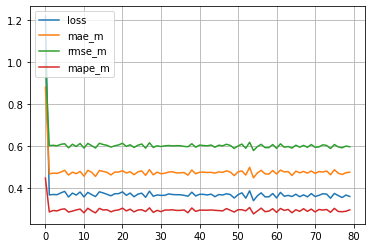

In [26]:
#設定答案
#history_mape = history.history.pop('mape_m')
fig, ax1 = plt.subplots() # 使用subplots()創建窗口
# 繪製折線圖像1, 標籤，線寬
ax1.plot(pn.DataFrame(history.history),label=history.history.keys()) 
mp.legend(loc=2)
#ax2 = ax1.twinx() # 創建第二個座標軸
#ax2.plot(history_mape, c='r', label='mape_m', linewidth = 1) #同上, 'o-'
#mp.legend(loc=1)
plt.grid(True)  # 樣式風格：網格型
plt.show()